In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Этап 0 - загрузка датасета
Исходные данные для sklearn - массивы numpy или pandas DataFrame
Лучше не смешивать - при конкатенации и построчном сравнении может произойти перемешивание строк из-за наличие нетривиального индекса у Dataframe. Лучше брать .values

In [3]:
# Загрузка датасета
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
# немного испортим данные
#dataset.loc[:,'EstimatedSalary'].values[1:35]=np.nan
dataset.loc[3:60,'EstimatedSalary']=np.nan
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0
1,15810944,Male,35,20000.0,0
2,15668575,Female,26,43000.0,0
3,15603246,Female,27,NaN,0
4,15804002,Male,19,NaN,0
...,...,...,...,...,...
395,15691863,Female,46,41000.0,1
396,15706071,Male,51,23000.0,1
397,15654296,Female,50,20000.0,1
398,15755018,Male,36,33000.0,0


In [18]:
dataset.loc[5:100,'Gender']='Alien'
dataset.loc[0:15,:]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000.0,0
1,15810944,Male,35,20000.0,0
2,15668575,Female,26,43000.0,0
3,15603246,Female,27,NaN,0
4,15804002,Male,19,NaN,0
5,15728773,Alien,27,NaN,0
6,15598044,Alien,27,NaN,0
7,15694829,Alien,32,NaN,1
8,15600575,Alien,25,NaN,0
9,15727311,Alien,35,NaN,0


## Этап 1. Разбиение на тестовую и  обучающую выборки.
Даже следующий этап - заполнение пропусков - требует разбиение на train\test, т.к. иначе возможна утечка косвенной информации о тестовой выборке


In [19]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train

array([['Female', 44, 39000.0],
       ['Alien', 32, 120000.0],
       ['Female', 38, 50000.0],
       ['Female', 32, 135000.0],
       ['Female', 52, 21000.0],
       ['Female', 53, 104000.0],
       ['Alien', 39, 42000.0],
       ['Male', 38, 61000.0],
       ['Female', 36, 50000.0],
       ['Female', 36, 63000.0],
       ['Alien', 35, 25000.0],
       ['Alien', 35, 50000.0],
       ['Male', 42, 73000.0],
       ['Alien', 47, nan],
       ['Female', 59, 29000.0],
       ['Male', 49, 65000.0],
       ['Female', 45, 131000.0],
       ['Alien', 31, nan],
       ['Female', 46, 82000.0],
       ['Female', 47, 51000.0],
       ['Alien', 26, 15000.0],
       ['Male', 60, 102000.0],
       ['Female', 38, 112000.0],
       ['Male', 40, 107000.0],
       ['Female', 42, 53000.0],
       ['Male', 35, 59000.0],
       ['Alien', 48, nan],
       ['Female', 48, 134000.0],
       ['Female', 38, 113000.0],
       ['Male', 29, 148000.0],
       ['Female', 26, 15000.0],
       ['Male', 60, 42000.0],
  

## Этап 2. Заполнить пропуски, избавиться от категориальных независимых переменных
Зачем убирать категориальные переменные? почему просто не пронумеровать классы (1-Female, 2-Male, 3- alien)?
Нам желательно получить некоторую монотонную функцию зависимости y от независимой переменной. Простая нумерация значений категориальной переменной  - скорее всего даст зависимость, очень далекую от монотонной.
(пример с названием города как Х и средней зп как Y)

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[:,2] = imp.fit_transform(X_train[:,2].reshape(-1, 1)).reshape(-1)
X_train

array([['Female', 44, 39000.0],
       ['Alien', 32, 120000.0],
       ['Female', 38, 50000.0],
       ['Female', 32, 135000.0],
       ['Female', 52, 21000.0],
       ['Female', 53, 104000.0],
       ['Alien', 39, 42000.0],
       ['Male', 38, 61000.0],
       ['Female', 36, 50000.0],
       ['Female', 36, 63000.0],
       ['Alien', 35, 25000.0],
       ['Alien', 35, 50000.0],
       ['Male', 42, 73000.0],
       ['Alien', 47, 71000.0],
       ['Female', 59, 29000.0],
       ['Male', 49, 65000.0],
       ['Female', 45, 131000.0],
       ['Alien', 31, 71000.0],
       ['Female', 46, 82000.0],
       ['Female', 47, 51000.0],
       ['Alien', 26, 15000.0],
       ['Male', 60, 102000.0],
       ['Female', 38, 112000.0],
       ['Male', 40, 107000.0],
       ['Female', 42, 53000.0],
       ['Male', 35, 59000.0],
       ['Alien', 48, 71000.0],
       ['Female', 48, 134000.0],
       ['Female', 38, 113000.0],
       ['Male', 29, 148000.0],
       ['Female', 26, 15000.0],
       ['Male', 60, 

In [21]:
# Заполнить пропущенные значения в X_test, не используя данные из X_test!
X_test[:,2] = imp.transform(X_test[:,2].reshape(-1, 1)).reshape(-1)
X_test

array([['Male', 30, 87000.0],
       ['Female', 38, 50000.0],
       ['Male', 35, 75000.0],
       ['Female', 30, 79000.0],
       ['Female', 35, 50000.0],
       ['Alien', 27, 71000.0],
       ['Female', 31, 15000.0],
       ['Male', 36, 144000.0],
       ['Female', 18, 68000.0],
       ['Male', 47, 43000.0],
       ['Alien', 30, 71000.0],
       ['Female', 28, 55000.0],
       ['Male', 37, 55000.0],
       ['Male', 39, 77000.0],
       ['Alien', 20, 71000.0],
       ['Alien', 32, 71000.0],
       ['Male', 37, 77000.0],
       ['Male', 19, 85000.0],
       ['Female', 55, 130000.0],
       ['Male', 35, 22000.0],
       ['Female', 35, 47000.0],
       ['Female', 47, 144000.0],
       ['Female', 41, 51000.0],
       ['Male', 47, 105000.0],
       ['Female', 23, 28000.0],
       ['Female', 49, 141000.0],
       ['Alien', 28, 87000.0],
       ['Alien', 29, 71000.0],
       ['Female', 37, 62000.0],
       ['Female', 32, 86000.0],
       ['Male', 21, 88000.0],
       ['Male', 37, 79000.0],
 

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
one_hot_array = enc.fit_transform(X_train[:,0].reshape(-1, 1)).todense()
X_train = np.concatenate((X_train,one_hot_array),axis=1)
X_train = X_train[:,1:]
X_train

matrix([[44, 39000.0, 0.0, 1.0, 0.0],
        [32, 120000.0, 1.0, 0.0, 0.0],
        [38, 50000.0, 0.0, 1.0, 0.0],
        ...,
        [36, 52000.0, 0.0, 0.0, 1.0],
        [27, 71000.0, 1.0, 0.0, 0.0],
        [26, 118000.0, 0.0, 1.0, 0.0]], dtype=object)

In [23]:
one_hot_array = enc.transform(X_test[:,0].reshape(-1, 1)).todense()
X_test = np.concatenate((X_test,one_hot_array),axis=1)
X_test = X_test[:,1:]
X_test

matrix([[30, 87000.0, 0.0, 0.0, 1.0],
        [38, 50000.0, 0.0, 1.0, 0.0],
        [35, 75000.0, 0.0, 0.0, 1.0],
        [30, 79000.0, 0.0, 1.0, 0.0],
        [35, 50000.0, 0.0, 1.0, 0.0],
        [27, 71000.0, 1.0, 0.0, 0.0],
        [31, 15000.0, 0.0, 1.0, 0.0],
        [36, 144000.0, 0.0, 0.0, 1.0],
        [18, 68000.0, 0.0, 1.0, 0.0],
        [47, 43000.0, 0.0, 0.0, 1.0],
        [30, 71000.0, 1.0, 0.0, 0.0],
        [28, 55000.0, 0.0, 1.0, 0.0],
        [37, 55000.0, 0.0, 0.0, 1.0],
        [39, 77000.0, 0.0, 0.0, 1.0],
        [20, 71000.0, 1.0, 0.0, 0.0],
        [32, 71000.0, 1.0, 0.0, 0.0],
        [37, 77000.0, 0.0, 0.0, 1.0],
        [19, 85000.0, 0.0, 0.0, 1.0],
        [55, 130000.0, 0.0, 1.0, 0.0],
        [35, 22000.0, 0.0, 0.0, 1.0],
        [35, 47000.0, 0.0, 1.0, 0.0],
        [47, 144000.0, 0.0, 1.0, 0.0],
        [41, 51000.0, 0.0, 1.0, 0.0],
        [47, 105000.0, 0.0, 0.0, 1.0],
        [23, 28000.0, 0.0, 1.0, 0.0],
        [49, 141000.0, 0.0, 1.0, 0.0],
       

## Этап 3. Нормализовать (шкалировать) признаки.
MinMaxScaler : Xnew = (X-min(X))/(max(X)-min(X))  - приведет все столбцы (признаки) к диапазону [0,1]

StandartScaler: Xnew = (X-mean(X))/std(X) - приведет все столбцы (признаки) к нелувому матожиданию и еденичному стандартному отклонению
    
### Зачем?
1.Без нормализации некорректно работают методы машинного обучения, использующие величину расстояния в пространстве признаков (KNN,SVM, кластеризация, некоторые виды регрессии)

2.В регрессии и некоторых других методах машинного обучения нельзя понять значимость переменных по коэфф.

3.Без нормализации некорректно работает регуляризация (штрафы за слишком большие коэфф. при независимых переменных)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[ 0.58164944, -1.06366936, -0.55167728,  1.25944706, -0.78288136],
       [-0.60673761,  1.50793201,  1.81265393, -0.79399923, -0.78288136],
       [-0.01254409, -0.71443954, -0.55167728,  1.25944706, -0.78288136],
       ...,
       [-0.21060859, -0.65094321, -0.55167728, -0.79399923,  1.27733275],
       [-1.10189888, -0.04772807,  1.81265393, -0.79399923, -0.78288136],
       [-1.20093113,  1.44443568, -0.55167728,  1.25944706, -0.78288136]])

In [26]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1.])

## Этап 4. Создать и обучить модель

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (max_depth = 8, n_estimators = 50)
clf.fit (X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=50)

## Этап 5. Оценить качество модели на тестовой выборке

In [28]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

### predict_proba - выдает вероятности для каждого из классов. Механизм работы зависит от используемого классификатора. Может быть softmax взвешивание (для регрессии или персептрона) или прямая оценка вероятности (для решающего дерева).

In [29]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[8.15130435e-01, 1.84869565e-01],
       [9.87838681e-01, 1.21613191e-02],
       [9.91938046e-01, 8.06195422e-03],
       [9.03333333e-01, 9.66666667e-02],
       [9.73333333e-01, 2.66666667e-02],
       [8.25123034e-01, 1.74876966e-01],
       [9.60000000e-01, 4.00000000e-02],
       [3.00000000e-02, 9.70000000e-01],
       [1.00000000e+00, 0.00000000e+00],
       [2.00000000e-01, 8.00000000e-01],
       [7.18979160e-01, 2.81020840e-01],
       [9.98461538e-01, 1.53846154e-03],
       [9.19090909e-01, 8.09090909e-02],
       [9.40063265e-01, 5.99367349e-02],
       [9.91059764e-01, 8.94023569e-03],
       [9.72296872e-01, 2.77031279e-02],
       [9.19987508e-01, 8.00124925e-02],
       [9.80000000e-01, 2.00000000e-02],
       [1.27222222e-01, 8.72777778e-01],
       [9.99090909e-01, 9.09090909e-04],
       [9.80000000e-01, 2.00000000e-02],
       [9.74365079e-02, 9.02563492e-01],
       [9.93333333e-01, 6.66666667e-03],
       [4.66666667e-02, 9.53333333e-01],
       [1.000000

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,65,3
1,5,27


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.92

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.90      0.84      0.87        32

    accuracy                           0.92       100
   macro avg       0.91      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100



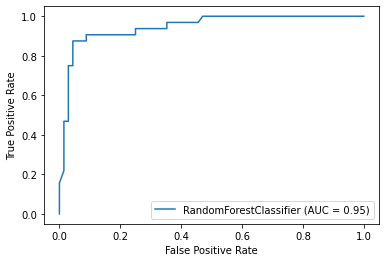

In [35]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)
plt.show()

 ### Мы получили матожидание метрики на тестовой выборке. Но как понять дисперсию, т.е. разброс метрики качества? Насколько будет стабильно качество модели на будущих выборках?

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy')

In [37]:
scores

array([0.9 , 0.95, 0.95, 0.9 , 0.85])

In [38]:
scores.mean()

0.9099999999999999

In [39]:
scores.std()

0.037416573867739396

### Этап 6. Оптимизация гиперпараметров 
![Схема кроссвалидации](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [40]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":(10,20,50,100), "max_depth":(3,5,8,16)}
grid = GridSearchCV(estimator=clf, param_grid=params, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9
{'max_depth': 3, 'n_estimators': 10}


In [42]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054805,0.004754,0.007193,0.001472,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.883333,0.833333,0.866667,0.933333,0.983333,0.900000,0.052705,1
1,0.107801,0.005191,0.012798,0.002398,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.883333,0.866667,0.866667,0.916667,0.966667,0.900000,0.038006,1
2,0.274799,0.022286,0.027401,0.005312,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.900000,0.833333,0.866667,0.916667,0.966667,0.896667,0.045216,3
3,0.592212,0.012779,0.068000,0.002828,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.883333,0.833333,0.866667,0.916667,0.966667,0.893333,0.045461,5
4,0.057999,0.003844,0.008399,0.001019,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.866667,0.816667,0.833333,0.900000,0.950000,0.873333,0.047842,14
5,0.112600,0.005459,0.011800,0.001468,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.883333,0.816667,0.866667,0.916667,0.966667,0.890000,0.050111,7
6,0.333397,0.017615,0.035403,0.006916,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.883333,0.866667,0.866667,0.900000,0.966667,0.896667,0.037118,3
7,0.639599,0.037204,0.056000,0.011951,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.883333,0.833333,0.866667,0.916667,0.966667,0.893333,0.045461,5
8,0.071002,0.020513,0.010601,0.004223,8,10,"{'max_depth': 8, 'n_estimators': 10}",0.883333,0.833333,0.850000,0.916667,0.900000,0.876667,0.030912,13
9,0.174000,0.045460,0.019999,0.004690,8,20,"{'max_depth': 8, 'n_estimators': 20}",0.916667,0.816667,0.833333,0.916667,0.916667,0.880000,0.045216,9


### ВСЕГДА Помнить про риск переобучения!
![Помнить про риск переобучения ВСЕГДА](https://miro.medium.com/max/875/1*6vPGzBNppqMHllg1o_se8Q.png)